In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import collections
from functools import partial
import warnings
warnings.filterwarnings('ignore')
import torch
import numpy as np
import pandas as pd
from numpy.random import uniform
from torch_geometric.loader import DataLoader
from torch.optim.lr_scheduler import StepLR

import colorlog

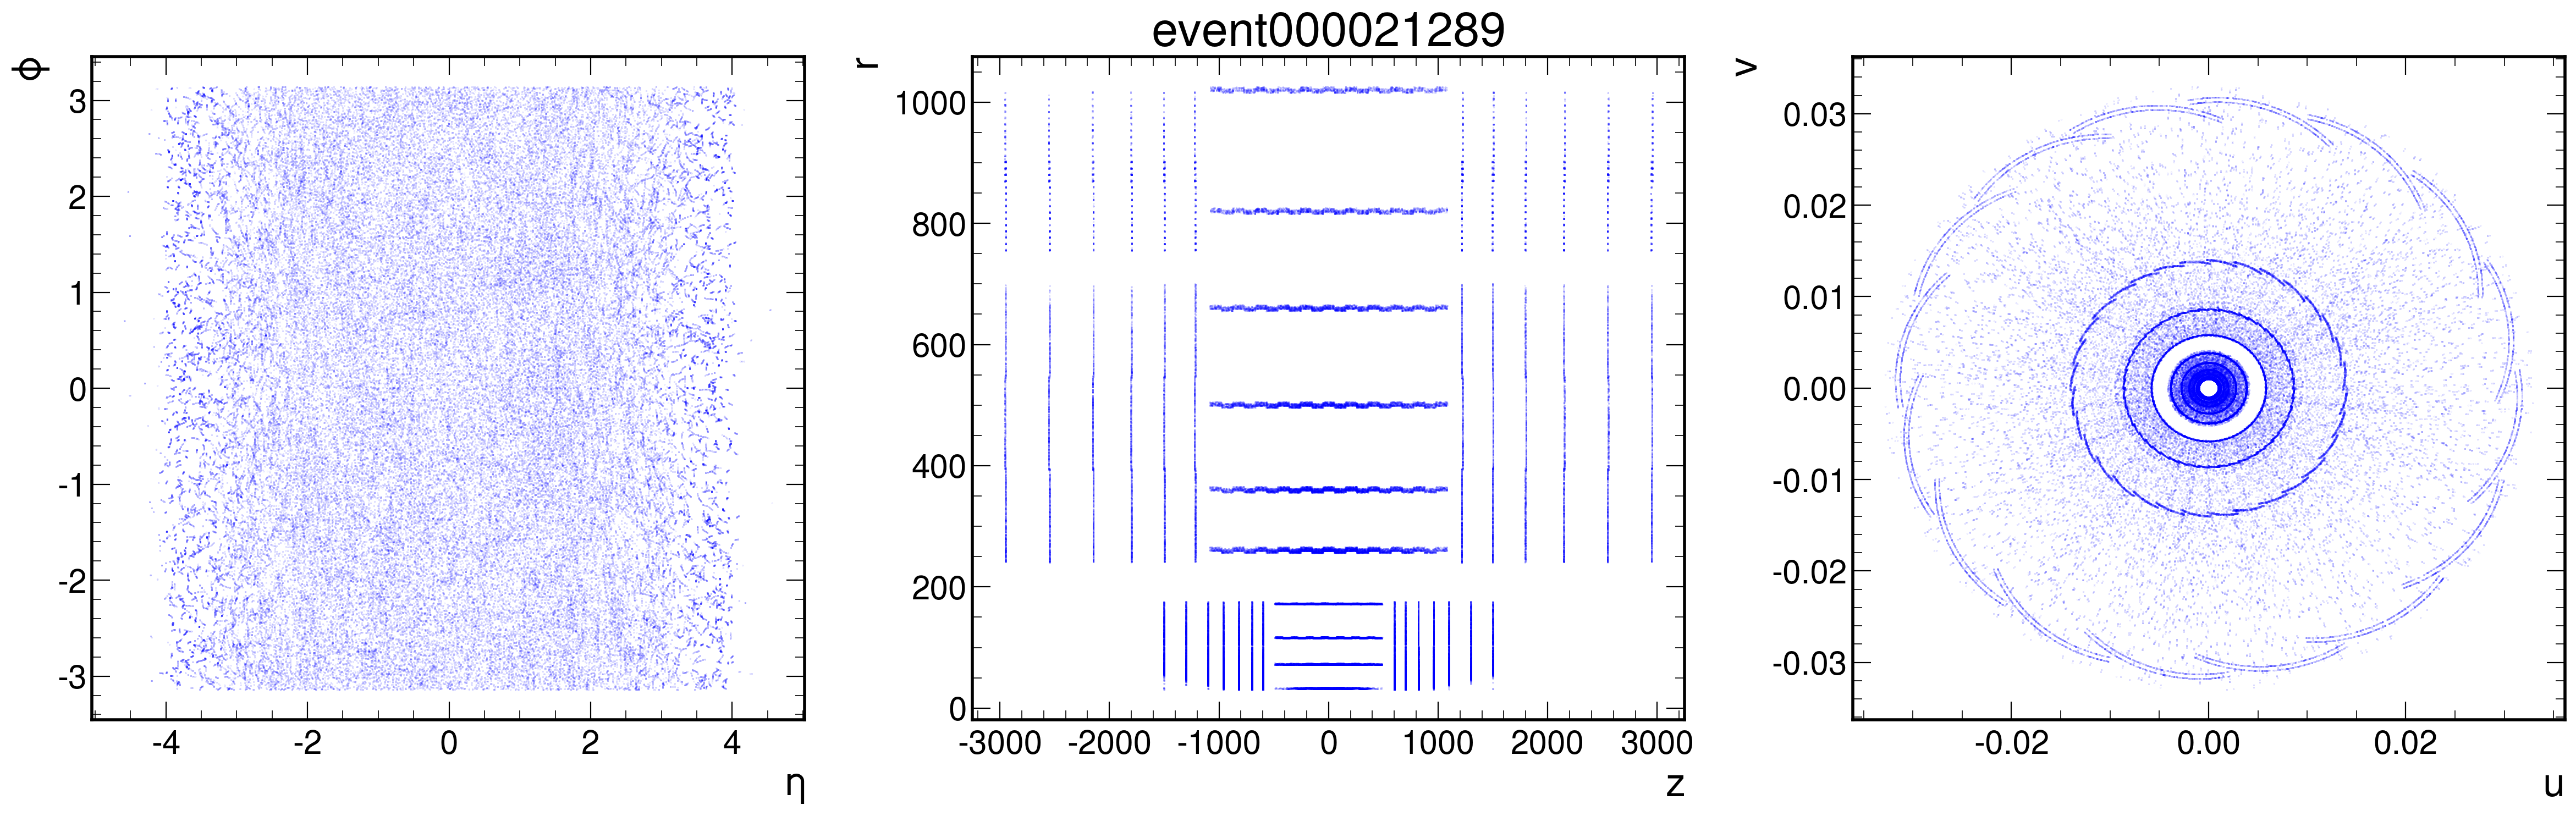

In [6]:
from gnn_tracking.utils.plotting import EventPlotter

n_evts, n_sectors = 100, 32
savefig = False
indir='/tigress/jdezoort/codalab/train_1'
event_plotter = EventPlotter(indir=indir)
event_plotter.plot_ep_rv_uv(evtid=21289, savefig=savefig,
                            filename='../plots/full_event.pdf')

In [ ]:
from gnn_tracking.preprocessing.point_cloud_builder import PointCloudBuilder

# build point clouds for each sector in the pixel layers only
pc_builder = PointCloudBuilder(indir='/tigress/jdezoort/codalab/train_1',
                               outdir='../point_clouds/',
                               n_sectors=n_sectors, pixel_only=True, 
                               redo=False, measurement_mode=False,
                               sector_di=0, sector_ds=1.3, thld=0.9,
                               log_level=0)
pc_builder.process(n=n_evts)

In [ ]:
# each point cloud is a PyG Data object 
point_cloud = pc_builder.data_list
pc_builder.get_measurements()

In [ ]:
from gnn_tracking.utils.plotting import PointCloudPlotter

# visualize the sectors in each event and an overlapped ('extended') sector
pc_plotter = PointCloudPlotter('../point_clouds', 
                               n_sectors=pc_builder.n_sectors)
pc_plotter.plot_ep_rv_uv_all_sectors(21289, savefig=savefig, filename='../plots/point_cloud.pdf')
pc_plotter.plot_ep_rv_uv_with_boundary(21289, 18, 
                                       pc_builder.sector_di,
                                       pc_builder.sector_ds,
                                       savefig=savefig, 
                                       filename='../plots/point_cloud_extended.pdf')

In [9]:
# we can build graphs on the point clouds using geometric cuts
from gnn_tracking.graph_construction.graph_builder import GraphBuilder

graph_builder = GraphBuilder(indir='/tigress/jdezoort/object_condensation/point_clouds/', 
                             outdir=' /tigress/jdezoort/object_condensation/graphs/', 
                             redo=False, measurement_mode=False, 
                             phi_slope_max=0.0035, z0_max=200, dR_max=2.3,
                             log_level=0)
graph_builder.process(start=0, stop=320)
graph_builder.get_measurements()

DEBUG: Processing data21164_s20.pt
DEBUG: Relabeled 290 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2441/78899 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21164_s20.pt
DEBUG: Processing data21866_s5.pt
DEBUG: Relabeled 324 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1925/41614 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21866_s5.pt
DEBUG: Processing data21282_s11.pt
DEBUG: Relabeled 227 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1802/41252 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21282_s11.pt
DEBUG: Processing data21150_s5.pt
DEBUG: Relabeled 303 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2387/61904 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21150_s5.pt
DEBUG: Processing data21647_s9.pt
DEBUG: Relabeled 313 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2248/50151 true edges

DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21491_s13.pt
DEBUG: Processing data21267_s29.pt
DEBUG: Relabeled 354 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2608/72187 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21267_s29.pt
DEBUG: Processing data21464_s25.pt
DEBUG: Relabeled 437 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2742/69914 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21464_s25.pt
DEBUG: Processing data21021_s25.pt
DEBUG: Relabeled 308 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2400/53755 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21021_s25.pt
DEBUG: Processing data21195_s12.pt
DEBUG: Relabeled 352 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2586/80872 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21195_s12.pt
DEBUG: Processing data21261_s13.pt
DEBUG: Relabeled 38

DEBUG: Relabeled 353 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2441/67911 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21291_s21.pt
DEBUG: Processing data21935_s18.pt
DEBUG: Relabeled 194 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1883/48384 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21935_s18.pt
DEBUG: Processing data21070_s30.pt
DEBUG: Relabeled 285 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1919/44356 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21070_s30.pt
DEBUG: Processing data21546_s25.pt
DEBUG: Relabeled 337 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2526/67602 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21546_s25.pt
DEBUG: Processing data21286_s23.pt
DEBUG: Relabeled 441 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2652/52849 true edges.
DEBUG: Writing  /tigress/jde

DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21117_s23.pt
DEBUG: Processing data21393_s26.pt
DEBUG: Relabeled 239 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1927/54427 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21393_s26.pt
DEBUG: Processing data21949_s10.pt
DEBUG: Relabeled 333 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2632/75812 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21949_s10.pt
DEBUG: Processing data21608_s6.pt
DEBUG: Relabeled 307 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2264/56137 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21608_s6.pt
DEBUG: Processing data21774_s30.pt
DEBUG: Relabeled 525 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2923/100673 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21774_s30.pt
DEBUG: Processing data21175_s27.pt
DEBUG: Relabeled 322

DEBUG: Relabeled 299 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1969/44321 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21378_s20.pt
DEBUG: Processing data21725_s27.pt
DEBUG: Relabeled 262 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1994/53272 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21725_s27.pt
DEBUG: Processing data21970_s8.pt
DEBUG: Relabeled 260 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1882/36621 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21970_s8.pt
DEBUG: Processing data21017_s16.pt
DEBUG: Relabeled 376 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2668/91977 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21017_s16.pt
DEBUG: Processing data21097_s20.pt
DEBUG: Relabeled 292 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2289/66132 true edges.
DEBUG: Writing  /tigress/jdezo

DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21724_s25.pt
DEBUG: Processing data21017_s25.pt
DEBUG: Relabeled 442 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2689/76541 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21017_s25.pt
DEBUG: Processing data21038_s7.pt
DEBUG: Relabeled 319 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2902/90593 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21038_s7.pt
DEBUG: Processing data21158_s28.pt
DEBUG: Relabeled 303 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2471/68093 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21158_s28.pt
DEBUG: Processing data21084_s9.pt
DEBUG: Relabeled 247 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2118/60777 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21084_s9.pt
DEBUG: Processing data21813_s17.pt
DEBUG: Relabeled 267 ed

DEBUG: Relabeled 264 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1855/43810 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21501_s1.pt
DEBUG: Processing data21626_s6.pt
DEBUG: Relabeled 307 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1981/54254 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21626_s6.pt
DEBUG: Processing data21919_s7.pt
DEBUG: Relabeled 212 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1837/45938 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21919_s7.pt
DEBUG: Processing data21321_s23.pt
DEBUG: Relabeled 463 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2279/49248 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21321_s23.pt
DEBUG: Processing data21529_s26.pt
DEBUG: Relabeled 352 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2231/57109 true edges.
DEBUG: Writing  /tigress/jdezoort

DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21857_s1.pt
DEBUG: Processing data21304_s21.pt
DEBUG: Relabeled 372 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2817/83284 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21304_s21.pt
DEBUG: Processing data21580_s22.pt
DEBUG: Relabeled 383 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2397/58766 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21580_s22.pt
DEBUG: Processing data21965_s27.pt
DEBUG: Relabeled 181 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1881/48948 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21965_s27.pt
DEBUG: Processing data21855_s5.pt
DEBUG: Relabeled 294 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2068/51757 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21855_s5.pt
DEBUG: Processing data21272_s11.pt
DEBUG: Relabeled 369 e

DEBUG: Relabeled 348 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2085/50784 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21384_s27.pt
DEBUG: Processing data21813_s8.pt
DEBUG: Relabeled 404 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2541/64891 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21813_s8.pt
DEBUG: Processing data21363_s7.pt
DEBUG: Relabeled 274 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2239/57092 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21363_s7.pt
DEBUG: Processing data21017_s8.pt
DEBUG: Relabeled 378 edges crossing from barrel to endcaps.
DEBUG: Updated y has 3077/102938 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21017_s8.pt
DEBUG: Processing data21959_s18.pt
DEBUG: Relabeled 230 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2212/68989 true edges.
DEBUG: Writing  /tigress/jdezoort

DEBUG: Processing data21548_s30.pt
DEBUG: Relabeled 341 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2526/87429 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21548_s30.pt
DEBUG: Processing data21476_s26.pt
DEBUG: Relabeled 403 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2499/82343 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21476_s26.pt
DEBUG: Processing data21135_s27.pt
DEBUG: Relabeled 387 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2464/62347 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21135_s27.pt
DEBUG: Processing data21070_s23.pt
DEBUG: Relabeled 289 edges crossing from barrel to endcaps.
DEBUG: Updated y has 1853/25518 true edges.
DEBUG: Writing  /tigress/jdezoort/object_condensation/graphs/data21070_s23.pt
DEBUG: Processing data21141_s4.pt
DEBUG: Relabeled 413 edges crossing from barrel to endcaps.
DEBUG: Updated y has 2757/101126 true 

{}

In [ ]:
from gnn_tracking.utils.plotting import GraphPlotter

# the graph plotter shows the true and false edges constructed by the builder
graph_plotter = GraphPlotter(indir='../graphs/')
graph = graph_builder.data_list[0]
print(graph)
evtid, s = graph.evtid.item(), graph.s.item()

#graph_plotter.plot_rz(graph_builder.data_list[0], 
#                      f'event{evtid}_s{s}', 
#                      scale=np.array([1,1,1]))

graph_plotter.plot_ep_rz_uv(graph, sector=s, name=f'data{evtid}_s{s}',
                            savefig=savefig, filename='../plots/graphs.pdf')

In [10]:
from gnn_tracking.models.track_condensation_networks import GraphTCN
from gnn_tracking.training.tcn_trainer import TCNTrainer
from gnn_tracking.utils.losses import (
    EdgeWeightBCELoss,
    EdgeWeightFocalLoss,
    PotentialLoss,
    BackgroundLoss,
    ObjectLoss,
)

# use cuda (gpu) if possible, otherwise fallback to cpu
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f'Utilizing {device}')

# use reference graph to get relevant dimensions 
g = graph_builder.data_list[0]
node_indim = g.x.shape[1]
edge_indim = g.edge_attr.shape[1]

# partition graphs into train, test, val splits
graphs = graph_builder.data_list
n_graphs = len(graphs)
rand_array = uniform(low=0, high=1, size=n_graphs)
train_graphs = [g for i, g in enumerate(graphs) if (rand_array<=0.75)[i]]
test_graphs = [g for i, g in enumerate(graphs) if ((rand_array>0.75) & (rand_array<=0.95))[i]]
val_graphs = [g for i, g in enumerate(graphs) if (rand_array>0.95)[i]]

# build graph loaders
params = {'batch_size': 1, 'shuffle': True, 'num_workers': 2}
train_loader = DataLoader(list(train_graphs), **params)
params = {'batch_size': 1, 'shuffle': False, 'num_workers': 2}
test_loader = DataLoader(list(test_graphs), **params)
val_loader = DataLoader(list(val_graphs), **params)
loaders = {'train': train_loader, 'test': test_loader,
           'val': val_loader}
print('Loader sizes:', [(k, len(v)) for k, v in loaders.items()])

# build loss function dictionary
q_min, sb = 0.01, 1
loss_functions = {
    "edge": EdgeWeightFocalLoss(gamma=5, alpha=0.95).to(device),
    "potential": PotentialLoss(q_min=q_min, device=device),
    "background": BackgroundLoss(device=device, sb=sb),
    #"object": ObjectLoss(device=device, mode='efficiency')
}

loss_weights = {
    # everything that's not mentioned here will be 1
    "edge": 500,
    "potential_attractive": 500,
    "potential_repulsive": 5,
    "background": 0.05,
    #"object": 1/250000,
}

# set up a model and trainer
model = GraphTCN(
    node_indim, 
    edge_indim,
    h_dim=10,
    e_dim=10,
    L_ec=5,
    L_hc=2,
    h_outdim=10, # output dim of the latent space
    hidden_dim=128,
)
model_parameters = filter(lambda p: p.requires_grad, 
                            model.parameters())
n_params = sum([np.prod(p.size()) for p in model_parameters])
print('number trainable params:', n_params)

scheduler = partial(StepLR, gamma=0.95, step_size=4)
trainer = TCNTrainer(
    model=model,
    loaders=loaders, 
    loss_functions=loss_functions,
    lr=0.005, 
    loss_weights=loss_weights, 
    device=device,
    lr_scheduler=scheduler,
)
print(trainer.loss_functions)

trainer.train()

ImportError: scipy.special._ufuncs_cxx does not export expected C variable _export_faddeeva_erfc

In [ ]:
from torch.optim.lr_scheduler import StepLR 
from gnn_tracking.models.track_condensation_networks import PointCloudTCN
from gnn_tracking.training.tcn_trainer import TCNTrainer
from gnn_tracking.utils.losses import (
    EdgeWeightBCELoss,
    PotentialLoss,
    BackgroundLoss,
    ObjectLoss,
)

# use cuda (gpu) if possible, otherwise fallback to cpu
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f'Utilizing {device}')

# use reference graph to get relevant dimensions 
p = pc_builder.data_list[0]
node_indim = p.x.shape[1]
hc_outdim = 2 # output dim of latent space  

# partition graphs into train, test, val splits
point_clouds = pc_builder.data_list
n_pcs = len(point_clouds)
rand_array = uniform(low=0, high=1, size=n_pcs)
train_pcs = [p for i, p in enumerate(point_clouds) if (rand_array<=0.6)[i]]
test_pcs = [p for i, p in enumerate(point_clouds) if ((rand_array>0.6) & (rand_array<=0.8))[i]]
val_pcs = [p for i, p in enumerate(point_clouds) if (rand_array>0.8)[i]]

# build graph loaders
params = {'batch_size': 1, 'shuffle': True, 'num_workers': 2}
train_loader = DataLoader(list(train_pcs), **params)
params = {'batch_size': 1, 'shuffle': False, 'num_workers': 2}
test_loader = DataLoader(list(test_pcs), **params)
val_loader = DataLoader(list(val_pcs), **params)
loaders = {'train': train_loader, 'test': test_loader,
           'val': val_loader}
print('Loader sizes:', [(k, len(v)) for k, v in loaders.items()])

# build loss function dictionary
q_min, sb = 0.01, 0.1
loss_functions = {
    "potential": PotentialLoss(q_min=q_min, device=device),
    "background": BackgroundLoss(device=device, sb=sb),
    #"object": ObjectLoss(device=device, mode='efficiency')
}

loss_weights = {
    # everything that's not mentioned here will be 1
    "potential_attractive": 1,
    "potential_repulsive": 10,
    "background": 1/10,
    #"object": 1/2500,
}

# set up a model and trainer
model = PointCloudTCN(node_indim, h_dim=8, e_dim=8, h_outdim=3, L=3, N_blocks=4, hidden_dim=100)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
n_params = sum([np.prod(p.size()) for p in model_parameters])
print('number trainable params:', n_params)
trainer = TCNTrainer(model=model, loaders=loaders, loss_functions=loss_functions,
                     lr=0.001, loss_weights=loss_weights, device=device,
                     lr_scheduler=partial(StepLR, gamma=0.9, step_size=5))
trainer.train()

NameError: name 'np' is not defined